<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week4ml/sol/d3/ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [64]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [65]:

iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [66]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
  df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
  df['target'] = iris_data.target
  df['class'] = iris_data.target_names[iris_data.target]
  df.columns = [col.replace("(cm)", "").strip() for col in df.columns]
  return df

    
    
df_iris = create_df()
df_iris
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
59,5.2,2.7,3.9,1.4,1,versicolor
7,5.0,3.4,1.5,0.2,0,setosa
76,6.8,2.8,4.8,1.4,1,versicolor
36,5.5,3.5,1.3,0.2,0,setosa
15,5.7,4.4,1.5,0.4,0,setosa
54,6.5,2.8,4.6,1.5,1,versicolor
37,4.9,3.6,1.4,0.1,0,setosa
95,5.7,3.0,4.2,1.2,1,versicolor
30,4.8,3.1,1.6,0.2,0,setosa
28,5.2,3.4,1.4,0.2,0,setosa


In [67]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [68]:

#From our data we will only get variable columns as np.array
x = 0
type(df_iris["sepal length"])
x = np.array(df_iris.iloc[:,:4])
x.shape

# YOUR CODE HERE

(150, 4)

In [69]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [70]:
import scipy.cluster.hierarchy as sch

In [ ]:
mergings = 0 


mergins = sch.linkage(x, 'complete')
mergins

In [ ]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

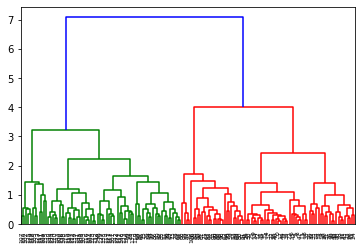

In [82]:
dn = 0
dn = sch.dendrogram(mergins, leaf_rotation = 90, leaf_font_size=6)
plt.show()

In [ ]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [83]:
from sklearn.cluster import KMeans

df = pd.read_csv('ch1ex1.csv')
points = df.values

new_df = pd.read_csv('ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [84]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters = 3)

In [85]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [86]:
# YOUR CODE HERE
labels = model.fit_predict(points)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [87]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [91]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in labels:
        if i==0:
            data_0.append(0)
        elif i==1:
            data_1.append(1)
        else:
            data_2.append(2)
    data_0=np.array(data_0)
    data_1=np.array(data_1)
    data_2=np.array(data_2)

    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95,)
(94,)
(111,)


In [ ]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

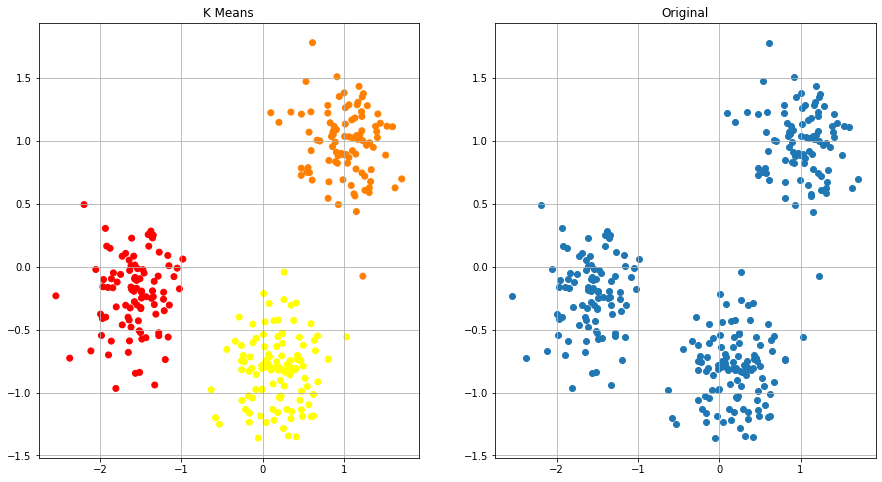

In [92]:
# plotting the data 

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(points[:,0],points[:,1],c=labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(points[:,0],points[:,1])
ax1.grid()
ax2.grid()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [95]:

new_labels=model.predict(new_points)

In [96]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [97]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

new_0,new_1,new_2=separate_labels(new_labels, points)


In [98]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

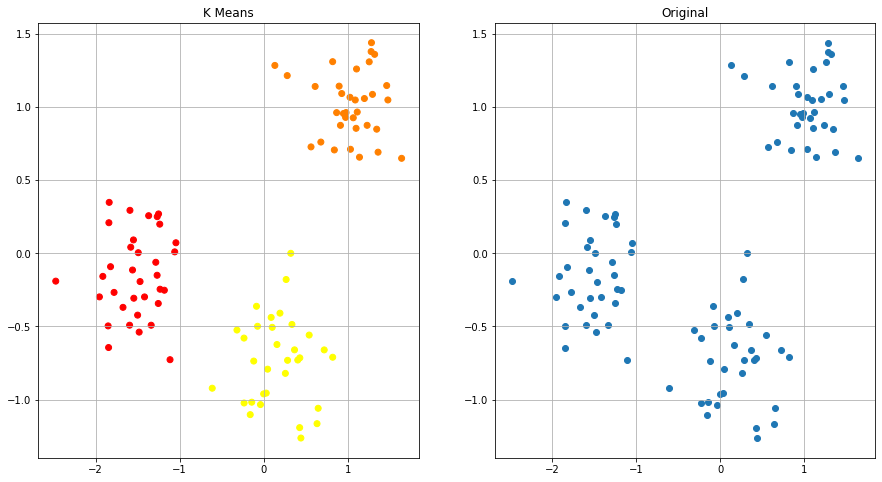

In [99]:
#plot the new labels


f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(new_points[:,0],new_points[:,1],c=new_labels,cmap="autumn")
ax2.set_title("Original")
ax2.scatter(new_points[:,0],new_points[:,1])
ax1.grid()
ax2.grid()

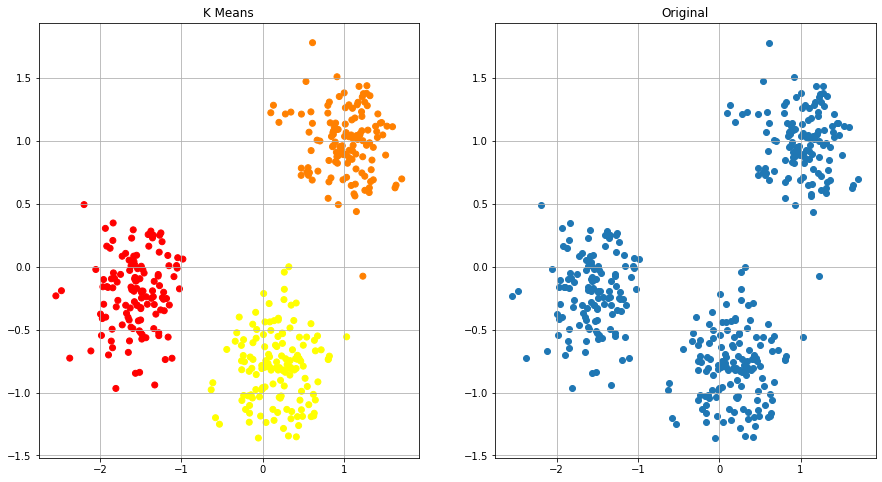

In [100]:
#plot all the points together

last_labels=np.append(labels, new_labels, 0)
last_points=np.append(points,new_points,0)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(last_points[:,0],last_points[:,1],c=last_labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(last_points[:,0],last_points[:,1])
ax1.grid()
ax2.grid()